In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = list(zip(lats, lngs))

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bluff nz
georgetown sh
imbituba br
ushuaia ar
phan thiet vn
atuona pf
verkhoshizhemye ru
punta arenas cl
kapaa us
mataura pf
rungata ki
mataura pf
belushya guba ru
clyde river ca
yulara au
qaanaaq gl
castro cl
nizhneyansk ru
eufaula us
avarua ck
arraial do cabo br
tacna pe
cape town za
acuna mx
ponta do sol cv
avarua ck
mataura pf
hobart au
dunedin nz
vaini to
jamestown sh
rikitea pf
illoqqortoormiut gl
saleaula ws
aasiaat gl
bilibino ru
taolanaro mg
cabedelo br
hasaki jp
sambava mg
fortuna us
zhigansk ru
taolanaro mg
atuona pf
chokurdakh ru
punta arenas cl
albany au
venice us
hilo us
rikitea pf
yar-sale ru
ushuaia ar
mbandaka cd
busselton au
bang lamung th
namibe ao
castro cl
tiksi ru
avarua ck
pevek ru
ushuaia ar
castro cl
carnarvon au
oranjestad aw
darnah ly
moyale ke
lebu cl
thompson ca
fort nelson ca
kavali in
avarua ck
torbay ca
mataura pf
victoria sc
busselton au
ushuaia ar
esperance au
northam au
taolanaro mg
hermanus za
nan th
saldanha za
ariquemes br
busselton au
lakatoro vu


souillac mu
rikitea pf
butaritari ki
albany au
tirumullaivasal in
rikitea pf
rikitea pf
punta arenas cl
aksu cn
nhulunbuy au
rikitea pf
cockburn town tc
chagoda ru
mataura pf
inuvik ca
santa maria del oro mx
touros br
bredasdorp za
vila velha br
coquimbo cl
busselton au
ribeira grande pt
noyabrsk ru
tiksi ru
mikuni jp
cidreira br
san patricio mx
hermanus za
atuona pf
hermanus za
rudnogorsk ru
qaanaaq gl
avarua ck
barrow us
arlit ne
tsihombe mg
kyaikto mm
dikson ru
avarua ck
ushuaia ar
quebo gw
torquay au
chorbog tj
attawapiskat ca
dwarka in
tuktoyaktuk ca
vaini to
hithadhoo mv
kurmanayevka ru
kapaa us
chabahar ir
valparaiso cl
guerrero negro mx
mataura pf
rio tercero ar
samusu ws
sinop tr
provideniya ru
armacao dos buzios br
vaini to
east london za
dingle ie
mataura pf
libenge cd
raudeberg no
sayyan ye
albany au
dalnerechensk ru
aklavik ca
katangli ru
khatanga ru
durant us
lagoa pt
mataura pf
albany au
cabo san lucas mx
bredasdorp za
leningradskiy ru
kapaa us
illoqqortoormiut gl
herman

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77695d243f707e5faa19b99b4b2cbf92


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data 
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrival       ")
print("------------------------------")

# Create counters 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrival       
------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | phan thiet
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | verkhoshizhemye
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rungata
City not found. Skipping...
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | eufaula
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1

Processing Record 35 of Set 4 | lorengau
Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | nemuro
Processing Record 39 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | ixtapa
Processing Record 42 of Set 4 | xuddur
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | kikuchi
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | dubbo
Processing Record 48 of Set 4 | usinsk
Processing Record 49 of Set 4 | prado
Processing Record 50 of Set 4 | gwadar
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | dakar
Processing Record 3 of Set 5 | burica
City not found. Skipping...
Processing Record 4 of Set 5 | mana
Processing Record 5 of Set 5 | neustadt
Processing Record 6 of Set 5 | vilhena
Processing Record 7 of Set 5 | caraballeda
Processing Record 8 of Set 5 | ha

Processing Record 25 of Set 8 | libenge
Processing Record 26 of Set 8 | raudeberg
Processing Record 27 of Set 8 | sayyan
Processing Record 28 of Set 8 | dalnerechensk
Processing Record 29 of Set 8 | katangli
Processing Record 30 of Set 8 | durant
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | badou
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | coari
Processing Record 35 of Set 8 | sisimiut
Processing Record 36 of Set 8 | ciudad bolivar
Processing Record 37 of Set 8 | obo
Processing Record 38 of Set 8 | sao sebastiao
Processing Record 39 of Set 8 | markova
Processing Record 40 of Set 8 | ukrayinka
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | itoman
Processing Record 44 of Set 8 | ossora
Processing Record 45 of Set 8 | vestmanna
Processing Record 46 of Set 8 | henties bay
Processing Record 47 of Set 8 | jawa
Processing Record 48 of Set 8 | felidhoo
City not found. Skipping..

Processing Record 14 of Set 12 | bereznik
Processing Record 15 of Set 12 | poddorye
Processing Record 16 of Set 12 | salo
Processing Record 17 of Set 12 | achisay
City not found. Skipping...
Processing Record 18 of Set 12 | panguna
Processing Record 19 of Set 12 | tebingtinggi
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | cochabamba
Processing Record 22 of Set 12 | san rafael
Processing Record 23 of Set 12 | batagay-alyta
Processing Record 24 of Set 12 | tucupita
Processing Record 25 of Set 12 | falealupo
City not found. Skipping...
Processing Record 26 of Set 12 | russell
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | show low
Processing Record 29 of Set 12 | yambio
Processing Record 30 of Set 12 | barabai
Processing Record 31 of Set 12 | ushtobe
Processing Record 32 of Set 12 | paita
Processing Record 33 of Set 12 | san pedro
Processing Record 34 of Set 12 | port hedland
Processing Record 35 of Set 12 | sola
Processing Record

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,52.00,88,100,14.00,NZ,2021-04-17 19:47:41
1,Georgetown,5.4112,100.3354,80.60,89,20,3.44,MY,2021-04-17 19:44:23
2,Imbituba,-28.2400,-48.6703,75.20,69,75,8.05,BR,2021-04-17 19:47:42
3,Ushuaia,-54.8000,-68.3000,60.80,44,40,12.66,AR,2021-04-17 19:47:21
4,Phan Thiet,10.9333,108.1000,76.64,78,56,3.62,VN,2021-04-17 19:47:42
5,Atuona,-9.8000,-139.0333,80.31,76,32,18.88,PF,2021-04-17 19:47:23
6,Verkhoshizhemye,58.0110,49.1038,34.88,89,6,3.91,RU,2021-04-17 19:47:43
7,Punta Arenas,-53.1500,-70.9167,55.40,50,75,9.22,CL,2021-04-17 19:47:43
8,Kapaa,22.0752,-159.3190,71.01,88,90,10.36,US,2021-04-17 19:47:21
9,Mataura,-46.1927,168.8643,52.00,88,100,14.00,NZ,2021-04-17 19:47:44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

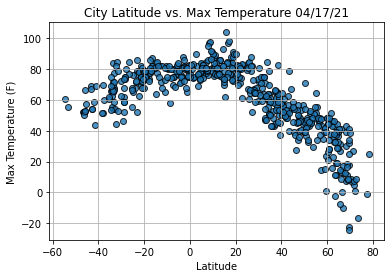

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

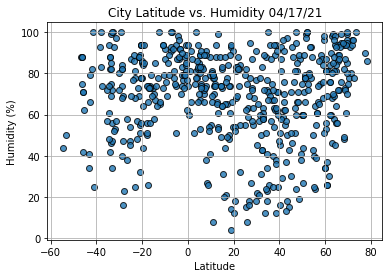

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

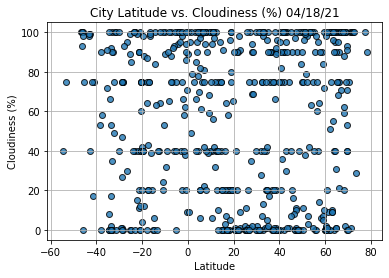

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

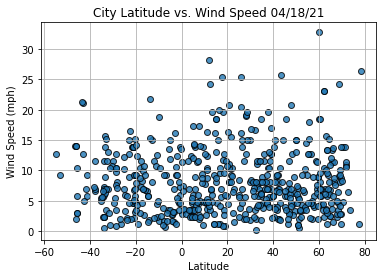

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept\
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Georgetown,5.4112,100.3354,80.60,89,20,3.44,MY,2021-04-17 19:44:23
4,Phan Thiet,10.9333,108.1000,76.64,78,56,3.62,VN,2021-04-17 19:47:42
6,Verkhoshizhemye,58.0110,49.1038,34.88,89,6,3.91,RU,2021-04-17 19:47:43
8,Kapaa,22.0752,-159.3190,71.01,88,90,10.36,US,2021-04-17 19:47:21
10,Clyde River,70.4692,-68.5914,8.60,78,75,13.80,CA,2021-04-17 19:47:45


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

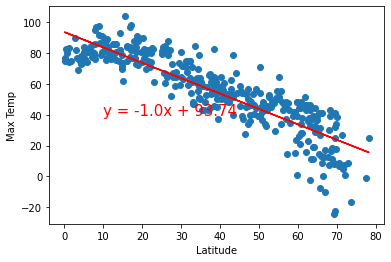

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

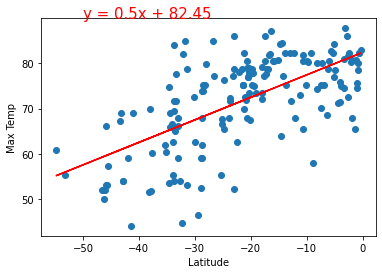

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

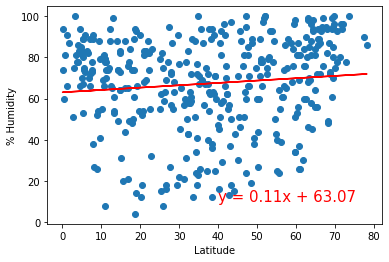

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

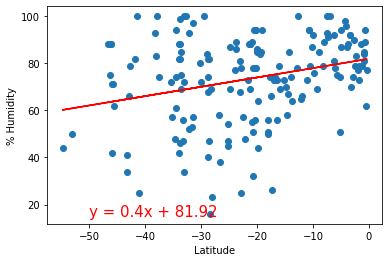

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [27]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Georgetown,5.4112,100.3354,80.60,89,20,3.44,MY,2021-04-17 19:44:23
4,Phan Thiet,10.9333,108.1000,76.64,78,56,3.62,VN,2021-04-17 19:47:42
6,Verkhoshizhemye,58.0110,49.1038,34.88,89,6,3.91,RU,2021-04-17 19:47:43
8,Kapaa,22.0752,-159.3190,71.01,88,90,10.36,US,2021-04-17 19:47:21
10,Clyde River,70.4692,-68.5914,8.60,78,75,13.80,CA,2021-04-17 19:47:45


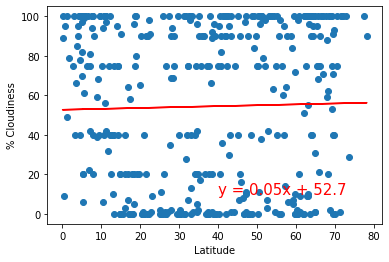

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

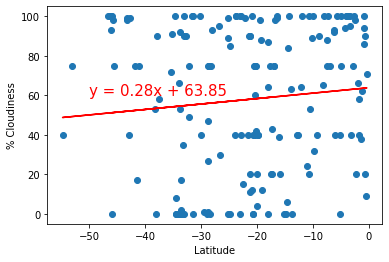

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

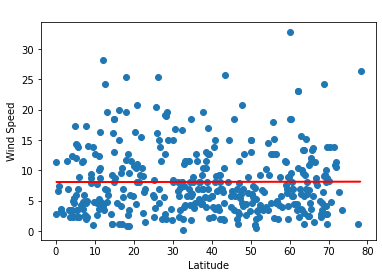

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

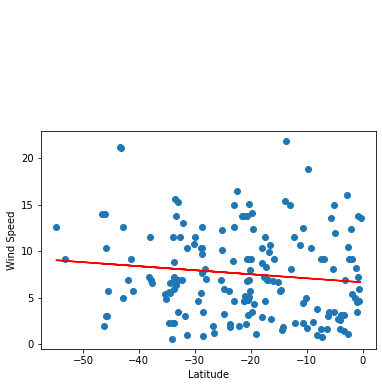

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
